In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import datetime

%matplotlib inline
plt.rcParams['font.family'] = 'IPAPGothic'

train_D = pd.read_table('data/train/train_D.tsv')

- まずユーザーの行動をイメージするために個人のデータを見る。

In [2]:
train_D[train_D['user_id'] == '0000000_D'].sort_values(by = 'time_stamp')

,user_id,product_id,event_type,ad,time_stamp
0,0000000_D,00436354_d,1,-1,2017-04-01 01:49:37.627
4,0000000_D,00101483_d,1,-1,2017-04-02 00:42:23.747
6,0000000_D,00708619_d,0,-1,2017-04-02 00:43:46.415
2,0000000_D,00109270_d,1,-1,2017-04-02 01:07:00.528
1,0000000_D,00137970_d,1,-1,2017-04-02 01:08:03.456
9,0000000_D,00190287_d,0,-1,2017-04-02 08:11:32.550
3,0000000_D,00224830_d,1,-1,2017-04-02 08:12:00.362
5,0000000_D,00708619_d,0,-1,2017-04-02 08:15:40.462
7,0000000_D,00708619_d,0,-1,2017-04-04 01:58:27.890
10,0000000_D,00190287_d,0,-1,2017-04-04 01:59:34.324


In [3]:
train_D[train_D['user_id'] == '0000001_D'].sort_values(by = 'time_stamp')

,user_id,product_id,event_type,ad,time_stamp
2984,0000001_D,00435940_d,1,-1,2017-04-01 08:47:21.196
2985,0000001_D,00688749_d,1,-1,2017-04-03 01:26:17.648
2988,0000001_D,00788412_d,1,-1,2017-04-03 07:43:18.076
2986,0000001_D,00266821_d,1,-1,2017-04-03 07:43:35.520
3004,0000001_D,00013990_d,0,-1,2017-04-04 03:17:36.948
3005,0000001_D,00013990_d,0,-1,2017-04-04 03:20:27.033
2987,0000001_D,00266821_d,1,-1,2017-04-05 03:36:04.230
3006,0000001_D,00013990_d,0,-1,2017-04-05 07:55:17.069
2989,0000001_D,00222506_d,1,-1,2017-04-05 08:59:23.019
2990,0000001_D,00354029_d,1,-1,2017-04-05 23:25:28.818


In [4]:
train_D[train_D['user_id'] == '0000002_D'].sort_values(by = 'time_stamp')

,user_id,product_id,event_type,ad,time_stamp
41741,0000002_D,00603643_d,0,-1,2017-04-04 10:55:33.352
41735,0000002_D,00710310_d,1,-1,2017-04-17 10:08:14.003
41736,0000002_D,00691990_d,1,-1,2017-04-25 12:55:26.644
41737,0000002_D,00020098_d,1,-1,2017-04-25 13:09:25.530
41738,0000002_D,00332694_d,1,-1,2017-04-28 08:04:55.316
41742,0000002_D,00202126_d,0,-1,2017-04-28 08:30:34.783
41739,0000002_D,00038795_d,1,-1,2017-04-28 08:43:06.101
41743,0000002_D,00005944_d,0,-1,2017-04-28 11:28:56.812
41744,0000002_D,00207725_d,0,-1,2017-04-28 11:28:56.812
41740,0000002_D,00462203_d,1,-1,2017-04-29 07:58:59.289


In [5]:
train_D[train_D['user_id'] == '0000003_D'].sort_values(by = 'time_stamp')

,user_id,product_id,event_type,ad,time_stamp
49686,0000003_D,00032404_d,0,-1,2017-04-03 08:26:27.744
49633,0000003_D,00047165_d,0,-1,2017-04-03 08:32:23.199
49691,0000003_D,00563768_d,0,-1,2017-04-03 08:32:23.199
49690,0000003_D,00719902_d,0,-1,2017-04-03 11:29:52.285
49692,0000003_D,00563768_d,0,-1,2017-04-03 17:17:13.578
49610,0000003_D,00672757_d,1,-1,2017-04-04 07:18:36.485
49611,0000003_D,00150357_d,1,-1,2017-04-04 09:47:02.074
49612,0000003_D,00121802_d,1,-1,2017-04-04 13:02:06.302
49613,0000003_D,00087767_d,1,-1,2017-04-04 17:18:37.212
49614,0000003_D,00220354_d,1,-1,2017-04-05 06:34:00.260


In [6]:
train_D[train_D['user_id'] == '0000004_D'].sort_values(by = 'time_stamp')

,user_id,product_id,event_type,ad,time_stamp
202755,0000004_D,00663924_d,1,-1,2017-04-02 08:27:54.732
202756,0000004_D,00217794_d,1,-1,2017-04-02 08:43:37.222
202763,0000004_D,00439308_d,0,-1,2017-04-02 10:33:55.399
202757,0000004_D,00502967_d,1,-1,2017-04-09 11:53:10.215
202758,0000004_D,00417270_d,1,-1,2017-04-15 13:53:51.291
202764,0000004_D,00722819_d,0,-1,2017-04-24 20:11:54.191
202759,0000004_D,00709419_d,1,-1,2017-04-27 11:59:33.953
202765,0000004_D,00424371_d,0,-1,2017-04-27 12:06:58.237
202762,0000004_D,00439308_d,1,-1,2017-04-30 03:54:12.752
202760,0000004_D,00382341_d,1,-1,2017-04-30 03:56:39.571


In [7]:
train_D[train_D['user_id'] == '0000005_D'].sort_values(by = 'time_stamp')

,user_id,product_id,event_type,ad,time_stamp
218995,0000005_D,00559513_d,0,-1,2017-04-05 09:30:23.281
218991,0000005_D,00462057_d,0,-1,2017-04-05 09:31:21.225
218993,0000005_D,00462057_d,0,-1,2017-04-05 09:35:06.991
218996,0000005_D,00559513_d,0,-1,2017-04-05 09:40:09.550
218992,0000005_D,00462057_d,0,-1,2017-04-05 09:40:41.797
218997,0000005_D,00461524_d,0,-1,2017-04-05 09:42:26.470
218999,0000005_D,00461524_d,0,-1,2017-04-05 09:43:38.817
218987,0000005_D,00582194_d,0,-1,2017-04-05 09:46:27.068
218981,0000005_D,00581257_d,1,-1,2017-04-05 09:52:02.564
218986,0000005_D,00582194_d,0,-1,2017-04-05 09:52:51.637


In [8]:
train_D[train_D['user_id'] == '0000006_D'].sort_values(by = 'time_stamp')

,user_id,product_id,event_type,ad,time_stamp
263680,0000006_D,00299626_d,1,-1,2017-03-31 17:18:14.308
263681,0000006_D,00555937_d,1,-1,2017-04-02 02:17:36.041
263727,0000006_D,00401209_d,0,-1,2017-04-03 13:03:26.963
263728,0000006_D,00054202_d,0,-1,2017-04-04 09:55:00.836
263682,0000006_D,00788798_d,1,-1,2017-04-05 10:15:30.039
263729,0000006_D,00536531_d,0,-1,2017-04-05 11:14:41.599
263733,0000006_D,00563652_d,0,-1,2017-04-06 11:46:08.004
263734,0000006_D,00563652_d,0,-1,2017-04-06 11:48:22.336
263683,0000006_D,00391402_d,1,-1,2017-04-06 12:35:48.803
263684,0000006_D,00328641_d,1,-1,2017-04-06 13:47:24.787


In [9]:
train_D[train_D['user_id'] == '0000007_D'].sort_values(by = 'time_stamp')

,user_id,product_id,event_type,ad,time_stamp
373508,0000007_D,00687461_d,0,-1,2017-04-01 15:01:12.639
373509,0000007_D,00345338_d,0,-1,2017-04-03 10:06:26.268
373507,0000007_D,00462494_d,1,-1,2017-04-05 16:26:13.271
373510,0000007_D,00012668_d,0,-1,2017-04-05 21:58:08.044
373511,0000007_D,00018745_d,0,-1,2017-04-08 04:47:53.779
373512,0000007_D,00406059_d,0,-1,2017-04-09 09:16:27.944
373513,0000007_D,00293540_d,0,-1,2017-04-09 09:37:56.192
373514,0000007_D,00754491_d,0,-1,2017-04-11 13:55:48.074
373515,0000007_D,00754491_d,0,-1,2017-04-13 12:27:04.143
373517,0000007_D,00266203_d,0,-1,2017-04-16 01:59:02.921


In [10]:
train_D[train_D['user_id'] == '0000008_D'].sort_values(by = 'time_stamp')

,user_id,product_id,event_type,ad,time_stamp
381046,0000008_D,00786561_d,0,-1,2017-03-31 22:25:42.464
381047,0000008_D,00786561_d,0,-1,2017-03-31 23:35:03.086
381067,0000008_D,00047166_d,0,-1,2017-04-01 02:58:44.948
381066,0000008_D,00192408_d,0,-1,2017-04-01 04:14:42.780
381045,0000008_D,00110800_d,0,-1,2017-04-01 04:16:26.415
381042,0000008_D,00171377_d,0,-1,2017-04-01 04:20:05.246
381063,0000008_D,00687658_d,0,-1,2017-04-01 04:21:33.295
381065,0000008_D,00128649_d,0,-1,2017-04-01 04:21:39.489
381054,0000008_D,00128717_d,0,-1,2017-04-01 04:21:39.489
381060,0000008_D,00128717_d,0,-1,2017-04-01 04:21:52.450


In [11]:
train_D[train_D['user_id'] == '0000009_D'].sort_values(by = 'time_stamp')

,user_id,product_id,event_type,ad,time_stamp
411715,0000009_D,00649229_d,1,-1,2017-04-01 05:02:00.794
411732,0000009_D,00427204_d,0,-1,2017-04-01 12:59:59.337
411733,0000009_D,00119406_d,0,-1,2017-04-01 13:42:59.599
411716,0000009_D,00478106_d,1,-1,2017-04-01 13:54:29.789
411714,0000009_D,00094279_d,1,-1,2017-04-01 14:33:07.834
411718,0000009_D,00768304_d,1,-1,2017-04-02 03:50:24.578
411734,0000009_D,00673385_d,0,-1,2017-04-02 04:39:40.976
411717,0000009_D,00683028_d,1,-1,2017-04-02 06:17:47.806
411735,0000009_D,00650112_d,0,-1,2017-04-04 08:33:23.711
411736,0000009_D,00407774_d,0,-1,2017-04-05 23:37:48.645


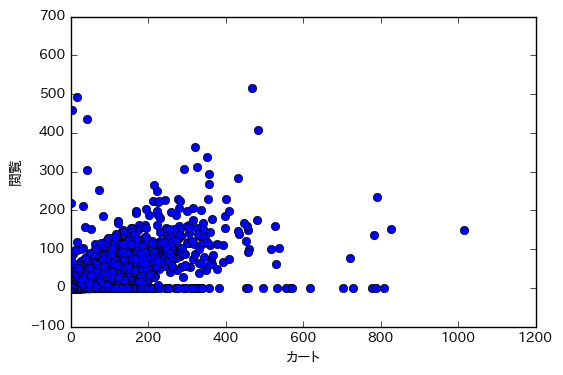

In [6]:
train_D['event_type_0'] = train_D['event_type'].map(lambda x: x==0)
train_D['event_type_1'] = train_D['event_type'].map(lambda x: x==1)
plt.plot(train_D.groupby('product_id')[['event_type_0', 'event_type_1']].sum().as_matrix()[:,0],
        train_D.groupby('product_id')[['event_type_0', 'event_type_1']].sum().as_matrix()[:,1],'o');
plt.axis('equal');
plt.xlabel(u'カート');
plt.ylabel(u'閲覧');

- 相関があるが偏っている商品もある